**To run a simulation:** run function `md.simulation(nSims, experiment, mas)` It will return accuracy for specified span, across simulations. 

**To test the code:**  set `debug = True` and use `md.model_loop()`
*Note:* Rehearse is loaded in the interface code - simply comment out that line to try code without rehearsal. 

In [1]:
import MODS_interface as md ################## in debug state for major update
import actr
import pandas as pd
import numpy as np
import random as rand
import matplotlib 

### initialize stims
stims = {3 : {'span_size': 3,
                  'corr_responses': ['4', '1', '7']}, 
         4 : {'span_size':4 ,
                  'corr_responses': ['3', '9', '2', '8']},    
         5 : {'span_size':5 ,
                  'corr_responses':['6', '4', '9', '1', '3']}, 
         6 : {'span_size': 6,
                  'corr_responses': ['8', '6', '4', '9','3', '5']}
        }

ACT-R connection has been started.
#|Warning: Non-ACT-R messages during load of "/Users/theodros/stag_2023/MODS_ACTR/andrea/Mods_a_la_Andy_upgrade.lisp":
;Compiler warnings for "/Users/theodros/stag_2023/MODS_ACTR/andrea/Mods_a_la_Andy_upgrade.lisp" :
;   In RETURN-WORD: Undeclared free variable Y

 |#


In [ ]:
#actr.run_n_events(500)

In [ ]:
md.nTrials

In [ ]:
md.model_loop()

In [ ]:
actr.run(2)

In [ ]:
actr.run(2)

In [ ]:
actr.whynot("check-memory")

In [ ]:
md.current_response

## Experiment

In [2]:
md.simulation(250, stims[6], 0.2)


/Users/theodros/stag_2023/MODS_ACTR/andrea/MODS_interface_update.py:224: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resps.loc[0:(span-1), s] = np.array(current_response) == np.array(corr_responses)
/Users/theodros/stag_2023/MODS_ACTR/andrea/MODS_interface_update.py:224: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resps.loc[0:(span-1), s] = np.array(current_response) == np.array(corr_responses)
/Users/theodros/stag_2023/MODS_ACTR/andrea/MODS_interface_update.py:224: PerformanceWarning: DataFrame is highly fragmented.  This i

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,True,True,True,False,True,False,True,True,True,False,...,True,True,False,True,False,True,True,True,False,True
1,True,False,True,True,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
2,True,True,False,False,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,False,True,True,False,False,True,True,...,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,False,True,True,...,True,False,True,False,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True


In [ ]:
actr.whynot('check-memory')
md.in_Position

In [ ]:
print(md.current_response)
print(md.stims[md.i])
print(md.corr_responses)
print(md.in_Position[md.i])
print(md.of_Type[md.i])
print(md.Pos_word[md.i])
print(md.i)
print(md.cr)


<AxesSubplot:xlabel='serial position', ylabel='accuracy'>

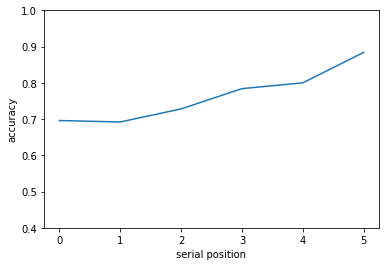

#|Warning: Cannot create a new module when there are models defined. |#
#|Warning: Parameter :EBLSE is not the name of an available parameter |#


In [5]:
md.resps.mean(axis=1).plot(ylim=(0.4,1), xlabel='serial position', ylabel='accuracy')
#md.resps

In [ ]:
span_acc

In [2]:
span_acc=pd.DataFrame({0:np.repeat('NaN',6)})
serial_acc = pd.DataFrame({0:np.repeat('NaN',6)})
p=0
for x in [3,4,5,6]:
    s=0
    print(x)
    for y in [0.5, 1, 1.5, 2, 2.5, 3, 3.5]:
        md.simulation(100, stims[x], y)
        span_temp = md.resps.mean().mean()
        serial_temp = md.resps.transpose().mean()
        span_acc.loc[x,s]= span_temp
        serial_acc.loc[0:x-1, p] = serial_temp
        s+=1
        p+=1
    

3


<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  span_temp = md.resps.mean().mean()
<ipython-input-2-bf09f5c6cca0>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  serial_temp = md.resps.transpose().mean()
<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

4


<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  span_temp = md.resps.mean().mean()
<ipython-input-2-bf09f5c6cca0>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  serial_temp = md.resps.transpose().mean()
<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

5


<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  span_temp = md.resps.mean().mean()
<ipython-input-2-bf09f5c6cca0>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  serial_temp = md.resps.transpose().mean()
<ipython-input-2-bf09f5c6cca0>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

6
#|## ACT-R has been Reset ##|#


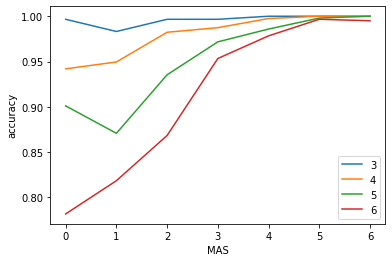

In [3]:
for i in [3,4,5,6]:
    span_acc.dropna().loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True) # IMAG=0.5

In [ ]:
for i in [3,4,5,6]:
    span_acc.dropna().loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True) #IMAG 1


In [ ]:
for i in [3,4,5,6]:
    span_acc.dropna().loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True) #IMAG 3


In [ ]:
for i in [3,4,5,6]:
    span_acc.dropna().loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True) #IMAG 4


In [ ]:
for i in [3,4,5,6]:
    span_acc.dropna().loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True) #IMAG 0


In [2]:
span_acc=pd.DataFrame({0:np.repeat('NaN',6)})
serial_acc = pd.DataFrame({0:np.repeat('NaN',6)})
p=0
for x in [3,4,5,6]:
    s=0
    md.simulation(100, stims[x], 0.5)
    span_temp = md.resps.mean().mean()
    serial_temp = md.resps.transpose().mean()
    span_acc.loc[x,s]= span_temp
    serial_acc.loc[0:x-1, p] = serial_temp
    s+=1
    p+=1

<ipython-input-2-e62ea3149c13>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  span_temp = md.resps.mean().mean()
<ipython-input-2-e62ea3149c13>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  serial_temp = md.resps.transpose().mean()
<ipython-input-2-e62ea3149c13>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence thi

<ipython-input-5-914941d997ca>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  serial_acc.mean(axis=1).plot(ylim=(0.4,1), xlabel='serial_position', ylabel='accuracy') #mas 1


<AxesSubplot:xlabel='serial_position', ylabel='accuracy'>

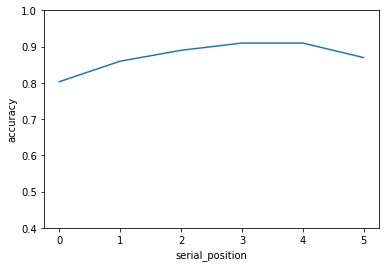

In [5]:
serial_acc.mean(axis=1).plot(ylim=(0.4,1), xlabel='serial_position', ylabel='accuracy') #mas 1

In [3]:
serial_acc

,0,1,2,3
0,0.98,0.91,0.84,0.66
1,1.0,0.94,0.89,0.75
2,0.99,0.96,0.90,0.81
3,NaN,1.00,0.92,0.81
4,NaN,NaN,0.94,0.88
5,NaN,NaN,NaN,0.87


In [ ]:
for i in [0,1,2,3,4,5,6]:
    span_acc.dropna().transpose().loc[i].plot( xlabel='span', ylabel='accuracy')

In [ ]:
span_acc.dropna().plot(x=[3,4,5,6], y=[0,1,2,3], xlabel='span', ylabel='accuracy',kind='scatter')

In [ ]:
span_acc.loc[0,0]=0.5
span_acc.loc[1,3]=0.3
span_acc

In [ ]:
print(md.stims)
print(md.in_Position)
print(md.Pos_word)

In [ ]:
print(md.current_response)
print(md.corr_responses)

In [ ]:
hlp=[1,2,3,4,5,6]
hlp.reverse()
hlp